# 2/ Definitions

In [9]:
# helper code needed for running in colab
if 'google.colab' in str(get_ipython()):
    print('Downloading plot_helpers.py to util/ (only neded for colab')
    !mkdir util; wget https://raw.githubusercontent.com/minireference/noBSLAnotebooks/master/util/plot_helpers.py -P util

In [10]:
# setup SymPy
from sympy import *
x, y, z, t = symbols('x y z t')
init_printing()

# setup plotting
%matplotlib inline
import matplotlib.pyplot as mpl
from util.plot_helpers import plot_vec, plot_vecs, autoscale_arrows

## SymPy Matrix objects

In [11]:
v = Matrix([1,2,3])
v

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [12]:
# define symbolically
v_1, v_2, v_3 = symbols('v_1 v_2 v_3')
v = Matrix([v_1,v_2,v_3])

In [13]:
v

⎡v₁⎤
⎢  ⎥
⎢v₂⎥
⎢  ⎥
⎣v₃⎦

In [14]:
v.T

[v₁  v₂  v₃]

In [15]:
A = Matrix(
    [   [1,7],
        [2,8], 
        [3,9]   ])
A

⎡1  7⎤
⎢    ⎥
⎢2  8⎥
⎢    ⎥
⎣3  9⎦

In [16]:
# define symbolically
a_11, a_12, a_21, a_22, a_31, a_32 = symbols('a_11 a_12 a_21 a_22 a_31 a_32')
A = Matrix([
        [a_11, a_12],
        [a_21, a_22], 
        [a_31, a_32]])

In [17]:
A

⎡a₁₁  a₁₂⎤
⎢        ⎥
⎢a₂₁  a₂₂⎥
⎢        ⎥
⎣a₃₁  a₃₂⎦

## Vector operations

In [18]:
u_1, u_2, u_3 = symbols('u_1 u_2 u_3')
u = Matrix([u_1,u_2,u_3])
v_1, v_2, v_3 = symbols('v_1 v_2 v_3')
v = Matrix([v_1,v_2,v_3])
alpha = symbols('alpha')

u

⎡u₁⎤
⎢  ⎥
⎢u₂⎥
⎢  ⎥
⎣u₃⎦

In [19]:
alpha*u

⎡α⋅u₁⎤
⎢    ⎥
⎢α⋅u₂⎥
⎢    ⎥
⎣α⋅u₃⎦

In [20]:
u+v

⎡u₁ + v₁⎤
⎢       ⎥
⎢u₂ + v₂⎥
⎢       ⎥
⎣u₃ + v₃⎦

In [21]:
u.norm()

In [22]:
uhat = u/u.norm()
uhat

⎡            u₁            ⎤
⎢──────────────────────────⎥
⎢   _______________________⎥
⎢  ╱     2       2       2 ⎥
⎢╲╱  │u₁│  + │u₂│  + │u₃│  ⎥
⎢                          ⎥
⎢            u₂            ⎥
⎢──────────────────────────⎥
⎢   _______________________⎥
⎢  ╱     2       2       2 ⎥
⎢╲╱  │u₁│  + │u₂│  + │u₃│  ⎥
⎢                          ⎥
⎢            u₃            ⎥
⎢──────────────────────────⎥
⎢   _______________________⎥
⎢  ╱     2       2       2 ⎥
⎣╲╱  │u₁│  + │u₂│  + │u₃│  ⎦

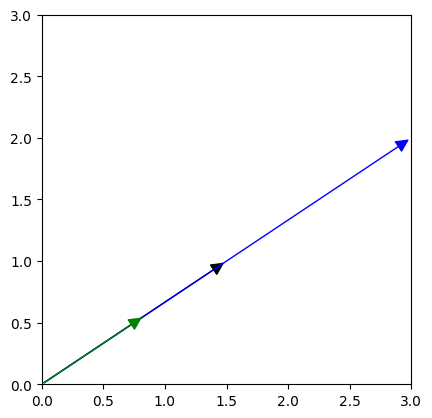

In [23]:
u = Matrix([1.5,1])
w = 2*u
uhat = u/u.norm()

fig = mpl.figure()
plot_vecs(u, w, uhat)
autoscale_arrows()

### Dot product

In [24]:
u = Matrix([u_1,u_2,u_3])
v = Matrix([v_1,v_2,v_3])

u.dot(v)

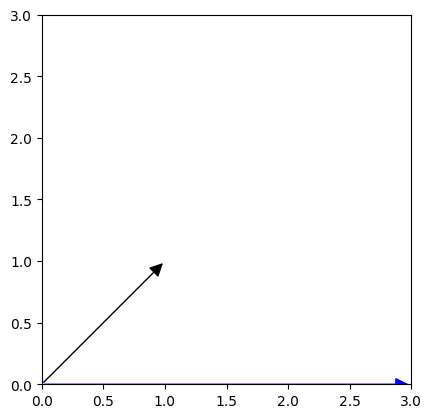

In [25]:
fig = mpl.figure()
u = Matrix([1,1])
v = Matrix([3,0])
plot_vecs(u,v)
autoscale_arrows()

u_dot_v = u.dot(v)
u_dot_v

In [26]:
phi = acos( u.dot(v)/(u.norm()*v.norm()) )
print('angle between u and v is', phi)
u.norm()*v.norm()*cos(phi)

angle between u and v is pi/4


### Cross product

In [27]:
u = Matrix([u_1,u_2,u_3])
v = Matrix([v_1,v_2,v_3])

u.cross(v)

⎡u₂⋅v₃ - u₃⋅v₂ ⎤
⎢              ⎥
⎢-u₁⋅v₃ + u₃⋅v₁⎥
⎢              ⎥
⎣u₁⋅v₂ - u₂⋅v₁ ⎦

In [28]:
u = Matrix([1,0,0])
v = Matrix([1,1,0])
w = u.cross(v)      # a vector perpendicular to both u and v

mpl.figure()
plot_vecs(u, v, u.cross(v))


TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [ ]:
print('length of cross product', w.norm())

phi = acos( u.dot(v)/(u.norm()*v.norm()) )

w.norm() == u.norm()*v.norm()*sin(phi)


length of cross product 1


True

## Projection operation

In [ ]:
def proj(vec, d):
    """Computes the projection of vector `vec` onto vector `d`."""
    return d.dot(vec)/d.norm() * d/d.norm()

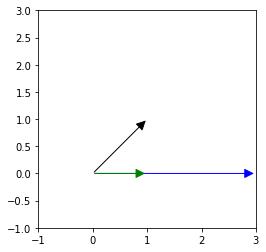

In [ ]:
fig = mpl.figure()
u = Matrix([1,1])
v = Matrix([3,0])

pu_on_v = proj(u,v)

plot_vecs(u, v, pu_on_v)


# autoscale_arrows()
ax = mpl.gca()
ax.set_xlim([-1,3])
ax.set_ylim([-1,3])



# Matrix operations

In [ ]:
a_11, a_12, a_21, a_22, a_31, a_32 = symbols('a_11 a_12 a_21 a_22 a_31 a_32')
A = Matrix([
        [a_11, a_12],
        [a_21, a_22], 
        [a_31, a_32]])
b_11, b_12, b_21, b_22, b_31, b_32 = symbols('b_11 b_12 b_21 b_22 b_31 b_32')
B = Matrix([
        [b_11, b_12],
        [b_21, b_22], 
        [b_31, b_32]])
alpha = symbols('alpha')

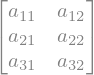

In [ ]:
A

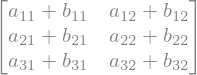

In [ ]:
A + B

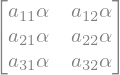

In [ ]:
alpha*A

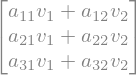

In [ ]:
v_1, v_2 = symbols('v_1 v_2')
v = Matrix([v_1,v_2])

A*v

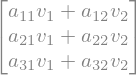

In [ ]:
A[:,0]*v[0] + A[:,1]*v[1]

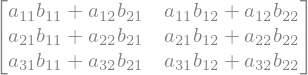

In [ ]:
A = Matrix([
        [a_11, a_12],
        [a_21, a_22], 
        [a_31, a_32]])
B = Matrix([
        [b_11, b_12],
        [b_21, b_22]])

A*B

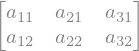

In [ ]:
A.T

In [ ]:
print('the shape of v is', v.shape)
v

the shape of v is  (2, 1)


In [ ]:
print('the shape of v.T is', v.T.shape)
v.T

the shape of v.T is  (1, 2)


In [ ]:
u = Matrix([u_1,u_2,u_3])
v = Matrix([v_1,v_2,v_3])

u.T*v

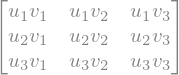

In [ ]:
u * v.T

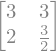

In [ ]:
A = Matrix([
        [3,       3],
        [2,  S(3)/2]
])
A

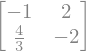

In [ ]:
A.inv()

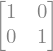

In [ ]:
A * A.inv()

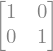

In [ ]:
A.inv() * A

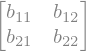

In [ ]:
B = Matrix([
        [b_11, b_12],
        [b_21, b_22]])
B

In [ ]:
B.trace()

In [ ]:
B.det()